# 4 — LSTM (Texto secuencial, word-level) con IMDB
**Portfolio ML — Ejercicio LSTM (secuencias)**  

In [12]:
import os, sys, pathlib, numpy as np
from sklearn.metrics import f1_score, accuracy_score
sys.path.append('../src')  
from utils import save_training_results, save_summary_csv, plot_training_history, plot_confusion_matrix, print_welcome_message
from lstm_data import IMDBData
from lstm_train import TextTrainer, TrainConfig
import importlib, lstm_models
importlib.reload(lstm_models)
from lstm_models import create_lstm_text_model


# Configuración específica del notebook
NOTEBOOK_NAME = "4_lstm_text_imdb"
MODEL_NAME = "lstm_imdb_tuned"
print_welcome_message(f"lstm_imdb_tuned {MODEL_NAME}")
print(f"Notebook: {NOTEBOOK_NAME}")

PROYECTO LSTM_IMDB_TUNED LSTM_IMDB_TUNED
Silvia Sandoval - Portfolio Machine Learning
Notebook: 4_lstm_text_imdb


## 1) Carga y preparación de los datos (IMDB)

In [13]:

data = IMDBData(num_words=20000, maxlen=256, random_state=42)

(x_tr, y_tr), (x_val, y_val), (x_test, y_test) = data.load_data_with_val(val_size=0.2)

print("x_tr:", x_tr.shape, "x_val:", x_val.shape, "x_test:", x_test.shape)
print("Clases:", data.get_class_names())



x_tr: (20000, 256) x_val: (5000, 256) x_test: (25000, 256)
Clases: ['negativo', 'positivo']


## 2) Definición del modelo LSTM

In [14]:
model = create_lstm_text_model(
    vocab_size=data.vocab_size(),
    maxlen=256,
    embed_dim=128,
    lstm_units=96,
    bidirectional=True,
    dropout=0.5,
    recurrent_dropout=0.25,
    spatial_dropout=0.2
)
model.summary()


c:\Users\seneyda\Downloads\ml-portfolio-2025\ml-portfolio-env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 3) Entrenamiento del modelo

In [ ]:
cfg = TrainConfig(
    epochs=5,          
    batch_size=128,
    lr=5e-4           
)
trainer = TextTrainer(model, MODEL_NAME, cfg)
trainer.compile()
history = trainer.train(x_tr, y_tr, x_val, y_val)
plot_training_history(history, NOTEBOOK_NAME, MODEL_NAME)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5696 - loss: 0.6747
Epoch 1: val_accuracy improved from None to 0.83160, saving model to results/lstm_imdb_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 1309s 8s/step - accuracy: 0.6477 - loss: 0.6257 - val_accuracy: 0.8316 - val_loss: 0.4212 - learning_rate: 5.0000e-04
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8069 - loss: 0.4572
Epoch 2: val_accuracy did not improve from 0.83160
157/157 ━━━━━━━━━━━━━━━━━━━━ 1079s 7s/step - accuracy: 0.8144 - loss: 0.4414 - val_accuracy: 0.8316 - val_loss: 0.3855 - learning_rate: 5.0000e-04
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8700 - loss: 0.3413
Epoch 3: val_accuracy improved from 0.83160 to 0.87040, saving model to results/lstm_imdb_best.h5


157/157 ━━━━━━━━━━━━━━━━━━━━ 1336s 9s/step - accuracy: 0.8752 - loss: 0.3288 - val_accuracy: 0.8704 - val_loss: 0.3229 - learning_rate: 5.0000e-04
Epoch 4/5
133/157 ━━━━━━━━━━━━━━━━━━━━ 2:17 6s/step - accuracy: 0.9051 - loss: 0.2670

In [6]:
#Sintonización del threshold en validación
best_thr, best_f1_val = trainer.tune_threshold(x_val, y_val)
print(f"Mejor threshold en validación: {best_thr:.3f} | F1_val: {best_f1_val:.4f}")


Mejor threshold en validación: 0.520 | F1_val: 0.8710


## 4) Evaluación + Guardado de resultados (summary.csv)

In [7]:
test_loss, _ = trainer.evaluate(x_test, y_test)

y_pred = trainer.predict_labels(x_test, threshold=best_thr)
test_acc = accuracy_score(y_test, y_pred)
test_f1  = f1_score(y_test, y_pred, average="binary")

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss:     {test_loss:.4f}")
print(f"Test F1:       {test_f1:.4f}")
print(f"Params:        {trainer.count_params()}")

results = save_training_results(
    history=history,
    test_accuracy=test_acc,
    test_loss=test_loss,
    f1=test_f1,
    model_name=MODEL_NAME,
    notebook_name=NOTEBOOK_NAME,
    training_time=trainer.get_training_time(),
    model_params=trainer.count_params()
)
save_summary_csv(results, NOTEBOOK_NAME)



Test Accuracy: 0.8568
Test Loss:     0.3587
Test F1:       0.8611
Params:        2732993
Resultados guardados en: ../results/2_lstm_text_imdb/training_results.json
Métricas añadidas al summary general: ../results/summary.csv


## 5) Matriz de confusión

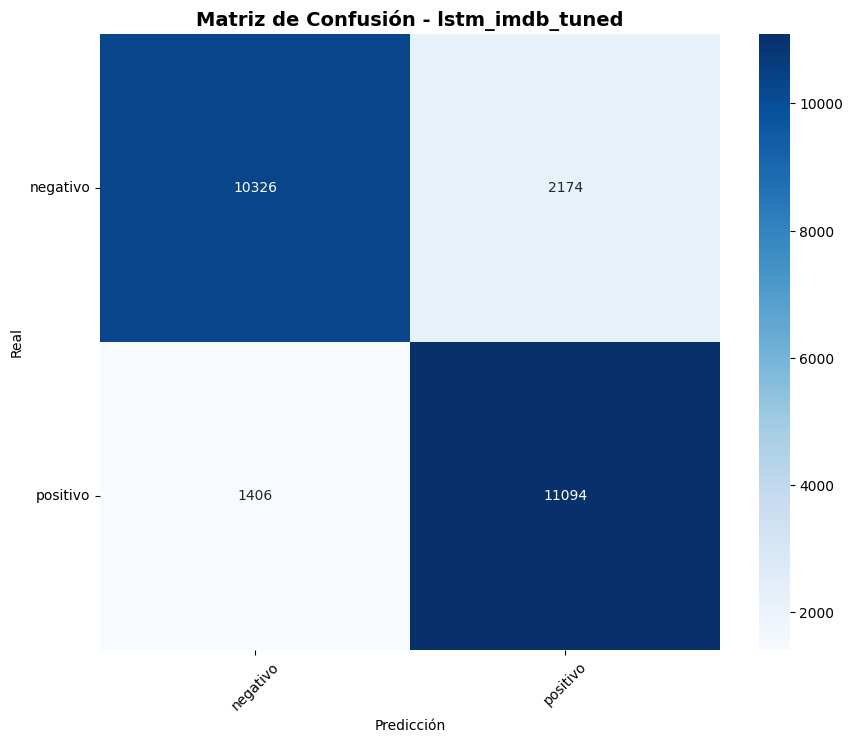

Matriz de confusión guardada en: ../results/2_lstm_text_imdb/confusion_matrix.png

EJEMPLOS BUENOS (alta confianza & correctos)
[i=15004] true=0 | pred=0 | proba=0.016
<START> awful awful awful show real world issues dealt with blatant <UNK> stereotypes galore what the hell is going on with the african american black guys eyebrows tyrone power awful awful awful awful awful show the fact that it lasted three seasons beggars belief this show truly is swill for the brain dead of mediocrity br br saved by the bell almost seemed humorous compared to this well upon hindsight no it's of the same banal ilk and therefore equally devoid of intelligence the only thing that it's missing so far is the jesus is god message the mentality and deliverance is the same yet somehow feels evil and soulless you can almost hear the tv executives buzz words at each other in fact i felt so <UNK> at this shows existence i felt compelled to comment br br awful awful awful show
-----------------------------------

In [8]:
plot_confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    class_names=data.get_class_names(),
    notebook_name=NOTEBOOK_NAME,
    model_name=MODEL_NAME
)
probs = trainer.predict_proba(x_test)
conf = np.abs(probs - 0.5) * 2

correct = np.where(y_pred == y_test)[0]
wrong   = np.where(y_pred != y_test)[0]

good_idx = correct[np.argsort(-conf[correct])[:5]]
bad_idx  = wrong[np.argsort(conf[wrong])[:5]]

def show_examples(idx_list, title):
    print("\n" + "="*80)
    print(title)
    print("="*80)
    for i in idx_list:
        txt = (data.decode_review(x_test[i]) if hasattr(data, "decode_review") else str(x_test[i]))[:800]
        print(f"[i={i}] true={y_test[i]} | pred={y_pred[i]} | proba={probs[i]:.3f}")
        print(txt + ("..." if len(txt) >= 800 else ""))
        print("-"*80)

show_examples(good_idx, "EJEMPLOS BUENOS (alta confianza & correctos)")
show_examples(bad_idx,  "EJEMPLOS MALOS (baja confianza & incorrectos)")


In [10]:
# %% [examples]
probs = trainer.predict_proba(x_test)
conf = np.abs(probs - 0.5) * 2

correct = np.where(y_pred == y_test)[0]
wrong   = np.where(y_pred != y_test)[0]

good_idx = correct[np.argsort(-conf[correct])[:5]]
bad_idx  = wrong[np.argsort(conf[wrong])[:5]]

def show_examples(idx_list, title):
    print("\n" + "="*80)
    print(title)
    print("="*80)
    for i in idx_list:
        txt = (data.decode_review(x_test[i]) if hasattr(data, "decode_review") else str(x_test[i]))[:800]
        print(f"[i={i}] true={y_test[i]} | pred={y_pred[i]} | proba={probs[i]:.3f}")
        print(txt + ("..." if len(txt) >= 800 else ""))
        print("-"*80)

show_examples(good_idx, "EJEMPLOS BUENOS (alta confianza & correctos)")
show_examples(bad_idx,  "EJEMPLOS MALOS (baja confianza & incorrectos)")



EJEMPLOS BUENOS (alta confianza & correctos)
[i=15004] true=0 | pred=0 | proba=0.016
<START> awful awful awful show real world issues dealt with blatant <UNK> stereotypes galore what the hell is going on with the african american black guys eyebrows tyrone power awful awful awful awful awful show the fact that it lasted three seasons beggars belief this show truly is swill for the brain dead of mediocrity br br saved by the bell almost seemed humorous compared to this well upon hindsight no it's of the same banal ilk and therefore equally devoid of intelligence the only thing that it's missing so far is the jesus is god message the mentality and deliverance is the same yet somehow feels evil and soulless you can almost hear the tv executives buzz words at each other in fact i felt so <UNK> at this shows existence i felt compelled to comment br br awful awful awful show
--------------------------------------------------------------------------------
[i=11730] true=0 | pred=0 | proba=0.